## Forecasting TSI with RNN

This is a notebook created to train the LSTM to forecast TSI, and to make tests with different settings looking for the best . It is being costumized with the purpose to generate results to the work will be submitted to ICCSA2020.

In [13]:
from library import *

In [14]:
np.random.seed(7)

Loading the input and the output data provided as results from the function model_

In [15]:
P = np.asarray(np.loadtxt('./partial_output_files/P_PY.csv'))
T = np.asarray(np.loadtxt('./partial_output_files/T_PY.csv'))
P = np.transpose(P)
T = T.reshape(-1,1)

Standarize the input and the output data

In [16]:
scaler = StandardScaler()

pn = scaler.fit_transform(P)
tn = scaler.fit_transform(T)

seriesSize = len(tn)

print(seriesSize)

587


In [17]:
np.savetxt('./partial_output_files/pn_PY.csv', pn)
np.savetxt('./partial_output_files/tn_PY.csv', tn)

In [18]:
mask_value = 2
tn[np.where(np.isnan(tn))] = mask_value

In [19]:
xTrain, xTest, yTrain, yTest= train_test_split(pn, tn, test_size=0.2, shuffle=True)

Reshaping the data into format (samples, timestep, features)

In [20]:
xTrain = xTrain.reshape((xTrain.shape[0], 1, xTrain.shape[1])) 
xTest = xTest.reshape((xTest.shape[0], 1, xTest.shape[1]))

In [21]:
units = 1
epochs = 300
batch_size=5
#dropout=0.1

In [22]:
xTrain.shape

(469, 1, 40)

In [23]:
yTrain.shape

(469, 1)

RNN setting to fixed net parameters:

In [25]:
model = Sequential()
model.add(Masking(mask_value=mask_value, input_shape=(xTrain.shape[1],xTrain.shape[2])))
model.add(GRU(units=units, input_shape=(xTrain.shape[1],xTrain.shape[2])))
#model.add(Dropout(dropout))
model.add(Dense(1))
model.compile(loss=['mean_squared_error'], optimizer='adam')

f = model.fit(xTrain, yTrain, epochs=epochs, batch_size=batch_size, validation_data=(xTest,yTest))

W0503 12:09:25.479630 19348 deprecation_wrapper.py:119] From C:\Users\Ami\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0503 12:09:28.037260 19348 deprecation_wrapper.py:119] From C:\Users\Ami\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0503 12:09:28.369123 19348 deprecation_wrapper.py:119] From C:\Users\Ami\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 469 samples, validate on 118 samples
Epoch 1/300
469/469 [==============================] - 5s 11ms/step - loss: 1.1100 - val_loss: 0.9195
Epoch 2/300
469/469 [==============================] - 0s 693us/step - loss: 1.0402 - val_loss: 0.8692
Epoch 3/300
469/469 [==============================] - 0s 624us/step - loss: 0.9851 - val_loss: 0.8278
Epoch 4/300
469/469 [==============================] - 0s 627us/step - loss: 0.9413 - val_loss: 0.7931
Epoch 5/300
469/469 [==============================] - 0s 720us/step - loss: 0.8999 - val_loss: 0.7534
Epoch 6/300
469/469 [==============================] - 0s 665us/step - loss: 0.8543 - val_loss: 0.7126
Epoch 7/300
469/469 [==============================] - 0s 797us/step - loss: 0.8037 - val_loss: 0.6663
Epoch 8/300
469/469 [==============================] - 0s 731us/step - loss: 0.7508 - val_loss: 0.6197
Epoch 9/300
469/469 [==============================] - 0s 754us/step - loss: 0.6935 - val_loss: 0.5671
Epoch 10/300
469/469 [======

469/469 [==============================] - 0s 652us/step - loss: 0.0834 - val_loss: 0.0704
Epoch 158/300
469/469 [==============================] - 0s 693us/step - loss: 0.0823 - val_loss: 0.0765
Epoch 159/300
469/469 [==============================] - 0s 663us/step - loss: 0.0824 - val_loss: 0.0733
Epoch 160/300
469/469 [==============================] - 0s 652us/step - loss: 0.0819 - val_loss: 0.0715
Epoch 161/300
469/469 [==============================] - 0s 722us/step - loss: 0.0839 - val_loss: 0.0670
Epoch 162/300
469/469 [==============================] - 0s 646us/step - loss: 0.0827 - val_loss: 0.0721
Epoch 163/300
469/469 [==============================] - 0s 671us/step - loss: 0.0826 - val_loss: 0.0723
Epoch 164/300
469/469 [==============================] - 0s 684us/step - loss: 0.0829 - val_loss: 0.0763
Epoch 165/300
469/469 [==============================] - 0s 631us/step - loss: 0.0832 - val_loss: 0.0720
Epoch 166/300
469/469 [==============================] - 0s 620us/ste

Script varying the net parameters for different number of hidden units, batch size, etc. ... 

In [ ]:
mse = []
#maxUnits = 1
maxTests = 5
minBatchSize = 1
maxBatchSize = 100

for i in range(minBatchSize,maxBatchSize,5): #used for different batch sizes
#for i in range(1,maxUnits+1):
    for j in range(maxTests):
        #print('Test #'+str(j+1)+' for '+str(i)+' units:')
        batch_size = int(xTrain.shape[0]*i/2/100)
        print('\n\nTest #'+str(j+1)+' for batch size = '+str(batch_size)+':')
        #units = i
        model = Sequential()
        model.add(Masking(mask_value=mask_value, input_shape=(xTrain.shape[1],xTrain.shape[2])))
        model.add(GRU(units=units, input_dim=xTrain.shape[2]))
        #model.add(Dropout(dropout))
        model.add(Dense(1))
        model.compile(loss='mean_squared_error', optimizer='adam')

        f = model.fit(xTrain, yTrain, epochs=epochs, batch_size=batch_size, validation_data=(xTest,yTest))
        
        mse.append([j, batch_size, np.min(f.history['val_loss'])])
        #mse.append([units, f.history['loss'][-1], f.history['val_loss'][-1]])
        #mse.append([j, units, np.min(f.history['val_loss'])])
    
    #np.savetxt('GRUTests\\HiddenUnitsTest_batch_size'+str(batch_size)+'_'+str(epochs)+'epochs.csv',mse)
    np.savetxt('GRUTests\\BatchSizeTest_'+str(units)+'units_'+str(epochs)+'epochs.csv',mse,fmt=['%i','%i','%.3f'])



Test #1 for batch size = 2:


C:\Users\Ami\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  app.launch_new_instance()
C:\Users\Ami\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `GRU` call to the Keras 2 API: `GRU(units=1, input_shape=(None, 40))`
  app.launch_new_instance()


Train on 469 samples, validate on 118 samples
Epoch 1/300
469/469 [==============================] - 13s 28ms/step - loss: 1.1038 - val_loss: 0.9773
Epoch 2/300
469/469 [==============================] - 1s 2ms/step - loss: 1.0154 - val_loss: 0.9066
Epoch 3/300
469/469 [==============================] - 1s 2ms/step - loss: 0.9438 - val_loss: 0.8322
Epoch 4/300
469/469 [==============================] - 1s 2ms/step - loss: 0.8596 - val_loss: 0.7415
Epoch 5/300
469/469 [==============================] - 1s 2ms/step - loss: 0.7606 - val_loss: 0.6361
Epoch 6/300
469/469 [==============================] - 1s 2ms/step - loss: 0.6559 - val_loss: 0.5320
Epoch 7/300
469/469 [==============================] - 1s 2ms/step - loss: 0.5631 - val_loss: 0.4519
Epoch 8/300
469/469 [==============================] - 1s 2ms/step - loss: 0.4855 - val_loss: 0.3810
Epoch 9/300
469/469 [==============================] - 1s 3ms/step - loss: 0.4243 - val_loss: 0.3269
Epoch 10/300
469/469 [=====================

Epoch 81/300
469/469 [==============================] - 4s 9ms/step - loss: 0.0908 - val_loss: 0.0824
Epoch 82/300
469/469 [==============================] - 4s 8ms/step - loss: 0.0887 - val_loss: 0.0731
Epoch 83/300
469/469 [==============================] - 4s 9ms/step - loss: 0.0910 - val_loss: 0.0733
Epoch 84/300
469/469 [==============================] - 6s 12ms/step - loss: 0.0888 - val_loss: 0.0731
Epoch 85/300
469/469 [==============================] - 5s 10ms/step - loss: 0.0883 - val_loss: 0.0773
Epoch 86/300
469/469 [==============================] - 6s 12ms/step - loss: 0.0903 - val_loss: 0.0822
Epoch 87/300
469/469 [==============================] - 4s 9ms/step - loss: 0.0899 - val_loss: 0.0776
Epoch 88/300
469/469 [==============================] - 5s 10ms/step - loss: 0.0881 - val_loss: 0.0794
Epoch 89/300
469/469 [==============================] - 4s 9ms/step - loss: 0.0889 - val_loss: 0.0754
Epoch 90/300
469/469 [==============================] - 4s 8ms/step - loss: 0.

469/469 [==============================] - 3s 6ms/step - loss: 0.0842 - val_loss: 0.0781
Epoch 240/300
469/469 [==============================] - 2s 3ms/step - loss: 0.0852 - val_loss: 0.0721
Epoch 241/300
469/469 [==============================] - 1s 3ms/step - loss: 0.0839 - val_loss: 0.0675
Epoch 242/300
469/469 [==============================] - 1s 3ms/step - loss: 0.0817 - val_loss: 0.0724
Epoch 243/300
469/469 [==============================] - 1s 3ms/step - loss: 0.0844 - val_loss: 0.0733
Epoch 244/300
469/469 [==============================] - 1s 3ms/step - loss: 0.0824 - val_loss: 0.0823
Epoch 245/300
469/469 [==============================] - 1s 3ms/step - loss: 0.0838 - val_loss: 0.0628
Epoch 246/300
469/469 [==============================] - 1s 3ms/step - loss: 0.0834 - val_loss: 0.0745
Epoch 247/300
469/469 [==============================] - 2s 3ms/step - loss: 0.0845 - val_loss: 0.0656
Epoch 248/300
469/469 [==============================] - 2s 4ms/step - loss: 0.0837 - v

469/469 [==============================] - 1s 2ms/step - loss: 0.0918 - val_loss: 0.0669
Epoch 99/300
469/469 [==============================] - 1s 2ms/step - loss: 0.0869 - val_loss: 0.0818
Epoch 100/300
469/469 [==============================] - 1s 2ms/step - loss: 0.0901 - val_loss: 0.0703
Epoch 101/300
469/469 [==============================] - 1s 2ms/step - loss: 0.0892 - val_loss: 0.0707
Epoch 102/300
469/469 [==============================] - 1s 2ms/step - loss: 0.0893 - val_loss: 0.0729
Epoch 103/300
469/469 [==============================] - 1s 2ms/step - loss: 0.0882 - val_loss: 0.0692
Epoch 104/300
469/469 [==============================] - 1s 2ms/step - loss: 0.0871 - val_loss: 0.0721
Epoch 105/300
469/469 [==============================] - 1s 2ms/step - loss: 0.0877 - val_loss: 0.0691
Epoch 106/300
469/469 [==============================] - 1s 2ms/step - loss: 0.0885 - val_loss: 0.0694
Epoch 107/300
469/469 [==============================] - 1s 2ms/step - loss: 0.0871 - va

469/469 [==============================] - 2s 5ms/step - loss: 0.0875 - val_loss: 0.0707
Epoch 257/300
469/469 [==============================] - 3s 6ms/step - loss: 0.0866 - val_loss: 0.0734
Epoch 258/300
469/469 [==============================] - 2s 4ms/step - loss: 0.0860 - val_loss: 0.0691
Epoch 259/300
469/469 [==============================] - 2s 5ms/step - loss: 0.0848 - val_loss: 0.0709
Epoch 260/300
469/469 [==============================] - 2s 5ms/step - loss: 0.0831 - val_loss: 0.0945
Epoch 261/300
469/469 [==============================] - 2s 5ms/step - loss: 0.0863 - val_loss: 0.0742
Epoch 262/300
469/469 [==============================] - 3s 6ms/step - loss: 0.0838 - val_loss: 0.0714
Epoch 263/300
469/469 [==============================] - 2s 4ms/step - loss: 0.0853 - val_loss: 0.0610
Epoch 264/300
469/469 [==============================] - 2s 4ms/step - loss: 0.0839 - val_loss: 0.0661
Epoch 265/300
469/469 [==============================] - 2s 4ms/step - loss: 0.0842 - v

In [11]:
yTrain.shape

(469, 1)

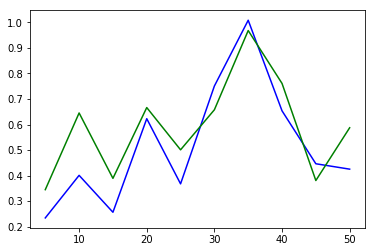

In [210]:
mse = np.asarray(mse)
plt.figure()
plt.plot(mse[:,0],mse[:,1],'b-',mse[:,0],mse[:,2],'g-')

In [26]:
# make predictions
trainPredictedY = model.predict(xTrain)
testPredictedY = model.predict(xTest)    

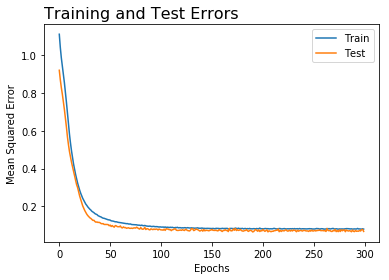

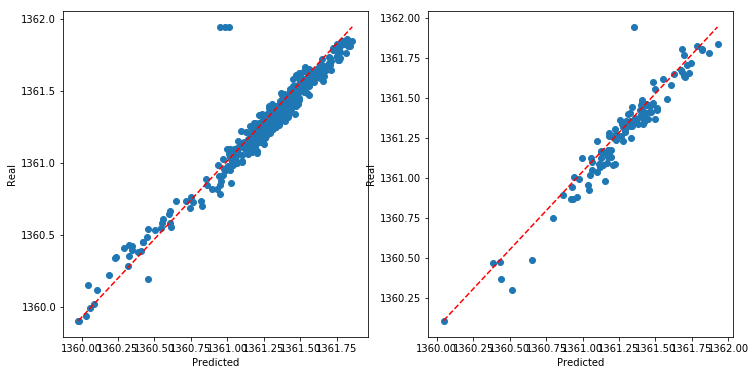

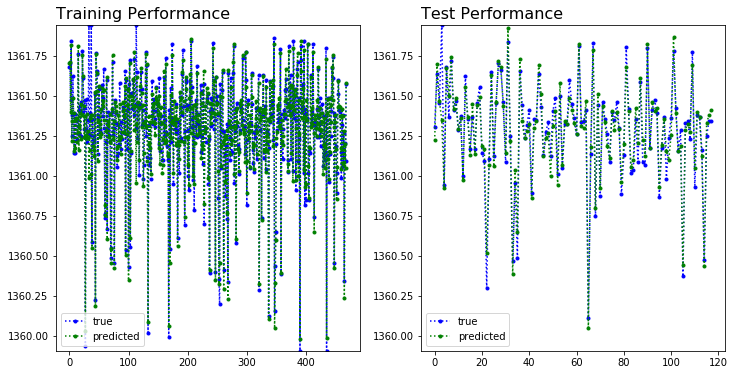

In [27]:
fig = plt.plot(fig_size=(12,6))
plt.plot(f.history['loss'], label='Train')
plt.plot(f.history['val_loss'], label='Test')
plt.title('Training and Test Errors', loc='left', fontsize=16)
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

trainPredictedY = scaler.inverse_transform(trainPredictedY)
yTrain = scaler.inverse_transform(yTrain)
#plt.figure()
ax1.scatter(trainPredictedY,yTrain)
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Real')
#plt.plot([-2,2],[-2,2])
ax1.plot([trainPredictedY.min(), trainPredictedY.max()], [yTrain.min(), yTrain.max()], color='red', 
         linestyle='--', label='optimal')

testPredictedY = scaler.inverse_transform(testPredictedY)
yTest = scaler.inverse_transform(yTest)
#plt.figure()
ax2.scatter(testPredictedY,yTest)
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Real')
#plt.plot([-2,2],[-2,2])
ax2.plot([testPredictedY.min(), testPredictedY.max()], [yTest.min(), yTest.max()], color='red', 
         linestyle='--', label='optimal')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
#plt.figure()
ax1.plot(yTrain,'b.:',label='true')
ax1.plot(trainPredictedY,'g.:',label='predicted')
ax1.set_ylim((yTrain.min(),yTrain.max()))
ax1.set_title('Training Performance', loc='left', fontsize=16)
ax1.legend()

#plt.figure()
ax2.plot(yTest,'b.:',label='true')
ax2.plot(testPredictedY,'g.:',label='predicted')
ax2.set_ylim((yTrain.min(),yTrain.max()))
ax2.set_title('Test Performance', loc='left', fontsize=16)
ax2.legend()

#trainPredict = scaler.inverse_transform(trainPredict)
#yTrain = scaler.inverse_transform([yTrain])
#testPredict = scaler.inverse_transform(testPredict)
#yTest = scaler.inverse_transform([yTest])

In [31]:
np.min(f.history['val_loss'])

0.06949395647714451

In [2]:
units

NameError: name 'units' is not defined